<a href="https://colab.research.google.com/github/Etienne-DUPUIS/detecteur-ambiance/blob/main/simple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train predictive model using Sensor data

In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


## Import & process data

In [3]:
csv_file ="/content/Tue Feb 23 12:59:45 2021.csv"
df = pd.read_csv(csv_file)
df

,Unnamed: 0,timestamp,Humidity,Temperature,Motion
0,0,Tue Feb 23 12:59:45 2021,70.0,22.0,0
1,1,Tue Feb 23 12:59:45 2021,70.0,22.0,0
2,2,Tue Feb 23 12:59:45 2021,70.0,22.0,0
3,3,Tue Feb 23 12:59:45 2021,70.0,22.0,0
4,4,Tue Feb 23 12:59:45 2021,70.0,22.0,0
...,...,...,...,...,...
906,906,Tue Feb 23 12:59:55 2021,66.0,22.0,0
907,907,Tue Feb 23 12:59:55 2021,66.0,22.0,0
908,908,Tue Feb 23 12:59:55 2021,66.0,22.0,0
909,909,Tue Feb 23 12:59:55 2021,66.0,22.0,0


In [22]:
# Statistical study of input dataframe
df[list(df.axes[1][2:])].aggregate({min, max, "mean", "median", "std"})

,Humidity,Temperature,Motion
min,66.000000,11.000000,0.0
max,161.000000,22.000000,0.0
median,66.000000,22.000000,0.0
mean,92.734358,18.993414,0.0
std,41.917104,4.905028,0.0


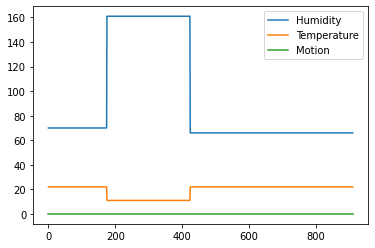

In [23]:
df[list(df.axes[1][2:])].plot()
plt.show()

## Define & train model

### Linear regression

coefficient of determination: 0.9987117354330204


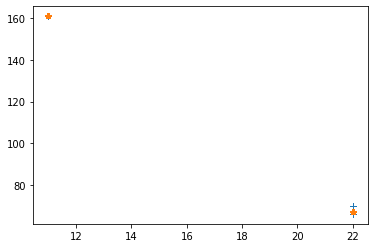

In [33]:
from sklearn.linear_model import LinearRegression

# linear regression
y = df['Humidity'].to_numpy().reshape((-1,1))
x = df['Temperature'].to_numpy().reshape((-1,1))

model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

plt.plot(x, y, '+', label="real Humidity")
plt.plot(x, model.predict(x), '*', label="predicted Humidity")
plt.show()